In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.api import add_constant, OLS
from sklearn.metrics import r2_score
from scipy.stats import shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.api import het_goldfeldquandt

In [2]:
df = pd.read_csv('https://www.statlearning.com/s/Advertising.csv', index_col = 0)

In [3]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


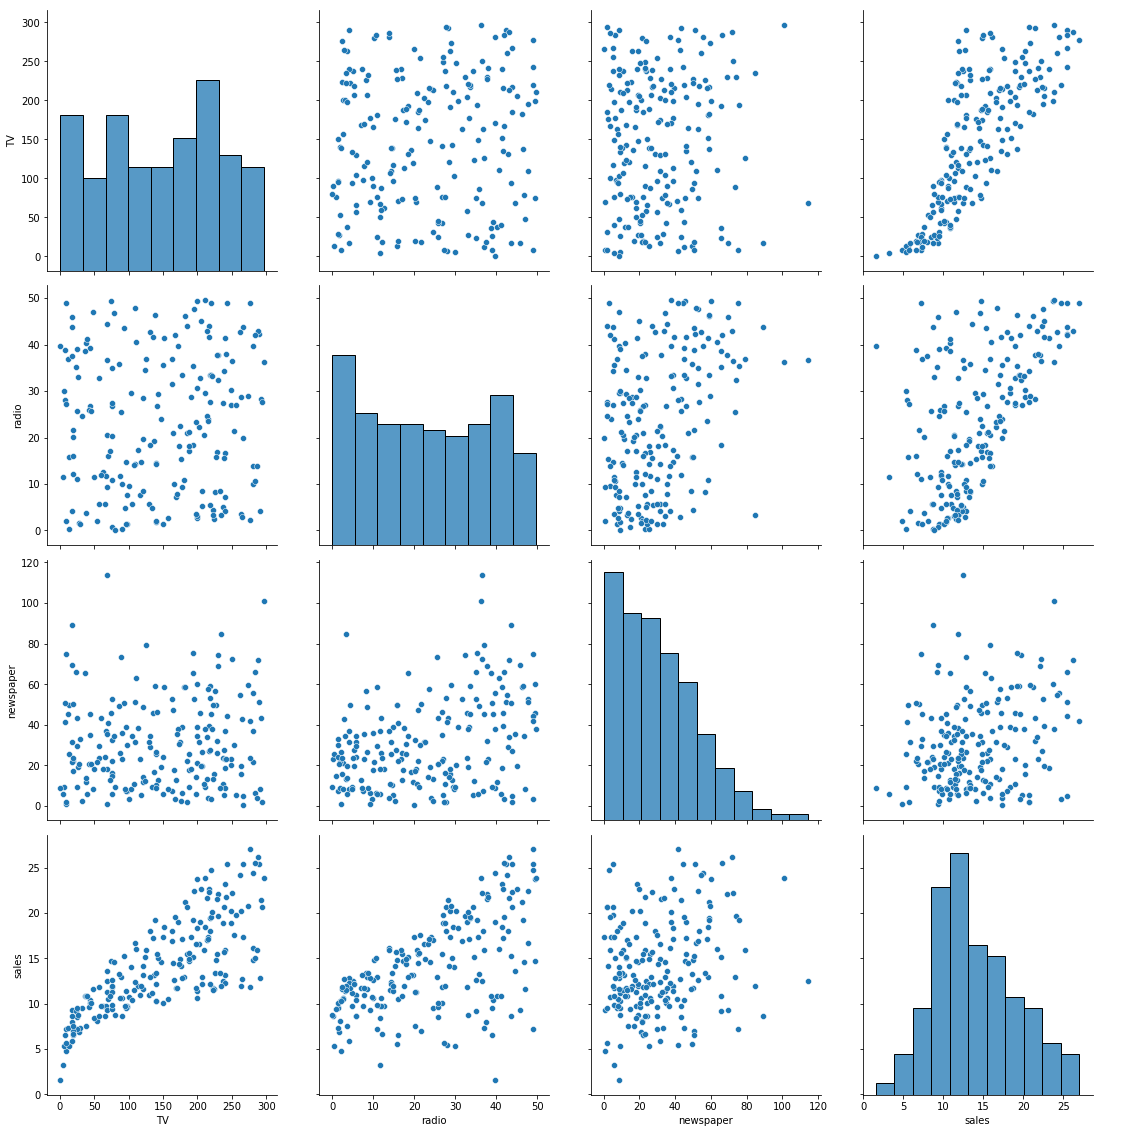

In [5]:
sns.pairplot(df, height = 4);

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [7]:
TV_squared = X[:,0] ** 2
TV_squared = TV_squared.reshape(X.shape[0],1)
X = np.hstack((X, TV_squared))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
X_train = add_constant(X_train)
X_test = add_constant(X_test)

In [11]:
reg = OLS(y_train, X_train[:, :-1]).fit()

In [12]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.5
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           1.09e-85
Time:                        18:16:45   Log-Likelihood:                -276.62
No. Observations:                 160   AIC:                             561.2
Df Residuals:                     156   BIC:                             573.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8313      0.109    126.716      0.000      13.616      14.047
x1             3.5622      0.110     32.429      0.000       3.345       3.779
x2             2.7922      0.115     24.310      0.000       2.565       3.019
x3            -0.0479      0.115     -0.415      0.679      -0.276       0.180
==============================================================================
Omnibus:                       12.534   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.333
Skew:                          -0.697   Prob(JB):                      0.00127
Kurtosis:                       3.233   Cond. No.                         1.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
y_pred = reg.predict(X_test[:, :-1])

In [14]:
r_sqd = r2_score(y_true = y_test, y_pred = y_pred)
adjr_sqd = 1 - (1 - r_sqd) * (y_test.shape[0] - 1) / (y_test.shape[0] - X_train[:, 1:-1].shape[1] - 1)
print(f'R squared = {r_sqd}')
print(f'Adjusted R squared = {adjr_sqd}')

R squared = 0.8353672324670596
Adjusted R squared = 0.8216478351726478


In [15]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_train[:, 1:-1], i) for i in range(X_train[:, 1:-1].shape[1])]
vif['Variable'] = df.columns[:-1]

In [16]:
vif

,VIF,Variable
0,1.012810,TV
1,1.107224,radio
2,1.115651,newspaper


C:\Users\m\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\m\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\m\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


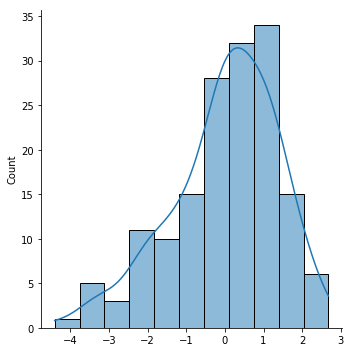

In [17]:
sns.displot(reg.resid, kde = True);

In [18]:
norm_test = shapiro(reg.resid)
print(f'Test Statistic = {norm_test[0]}')
print(f'p value = {norm_test[1]}')

Test Statistic = 0.9640538692474365
p value = 0.0003611894208006561


In [19]:
acorr_ljungbox(reg.resid)

,lb_stat,lb_pvalue
1,0.706104,0.400740
2,3.658332,0.160547
3,4.380849,0.223168
4,4.776408,0.311018
5,4.880454,0.430643
6,9.858830,0.130724
7,12.755566,0.078293
8,12.999119,0.111880
9,13.001495,0.162539
10,13.413793,0.201447


In [20]:
gfq = het_goldfeldquandt(reg.resid, reg.model.exog[:, 1:])
print(f'F Statistic = {gfq[0]}')
print(f'p value = {gfq[1]}')

F Statistic = 0.8888340956861035
p value = 0.6967993030084666


### With TV squared

In [21]:
reg = OLS(y_train, X_train).fit()

In [22]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     526.0
Date:                Tue, 16 Nov 2021   Prob (F-statistic):           4.84e-89
Time:                        18:16:49   Log-Likelihood:                -265.24
No. Observations:                 160   AIC:                             540.5
Df Residuals:                     155   BIC:                             555.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8313      0.102    135.613      0.000      13.630      14.033
x1             5.4681      0.405     13.504      0.000       4.668       6.268
x2             2.8305      0.108     26.304      0.000       2.618       3.043
x3            -0.0216      0.108     -0.201      0.841      -0.235       0.191
x4            -1.9752      0.406     -4.866      0.000      -2.777      -1.173
==============================================================================
Omnibus:                        0.014   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.993   Jarque-Bera (JB):                0.105
Skew:                           0.015   Prob(JB):                        0.949
Kurtosis:                       2.878   Cond. No.                         7.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
y_pred = reg.predict(X_test)

In [24]:
r_sqd = r2_score(y_true = y_test, y_pred = y_pred)
adjr_sqd = 1 - (1 - r_sqd) * (y_test.shape[0] - 1) / (y_test.shape[0] - X_train[:, 1:].shape[1] - 1)
print(f'R squared = {r_sqd}')
print(f'Adjusted R squared = {adjr_sqd}')

R squared = 0.8718951926935219
Adjusted R squared = 0.8572546432870672


C:\Users\m\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\m\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\m\AppData\Roaming\Python\Python37\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


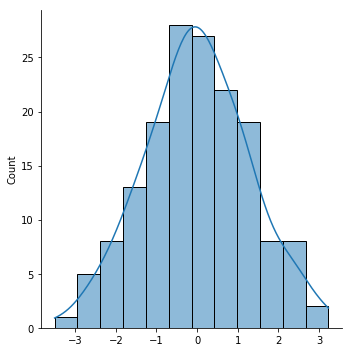

In [25]:
sns.displot(reg.resid, kde = True);

<hr>